# Text classification project
##### For the course 2022 Python Machine Learning & Data Science Masterclass

For this project, we will use the [Movie Reviews dataset](https://ai.stanford.edu/~amaas/data/sentiment/) and create a tree-based model capable of predict the behaviour to retain customer, to predict whether or not a customer will churn.

In [1]:
# Imports

import numpy as np
import pandas as pd

### Dataset exploration

In [2]:
reviews_df = pd.read_csv("data/Movie_Reviews.csv")
reviews_df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [3]:
## Checking if we have null values

reviews_df.isna().sum()

label      0
review    35
dtype: int64

In [4]:
## Removing na/null values

reviews_df = reviews_df.dropna()

In [5]:
# Let's check if we have empty string values as reviews

reviews_df["review"].str.isspace().sum()

27

In [6]:
# We have 27 reviews that are empty strings. We remove them as well.
#reviews_df['review'].str.isspace()
reviews_df = reviews_df[reviews_df["review"].str.isspace() != True]
reviews_df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [7]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


In [8]:
# Let's check the possible classes and how balanced they are

reviews_df["label"].value_counts()

pos    969
neg    969
Name: label, dtype: int64

### Creation of train and test sets

In [9]:
from sklearn.model_selection import train_test_split

X = reviews_df["review"]
y = reviews_df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

### Model creation

We will use Pipeline to create two models. One will use Bag of Words and the other one will use TF-IDF to vectorize the reviews.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC

In [11]:
# Creation of the pipeline

pipe_bow = Pipeline([("bow", CountVectorizer(stop_words="english")), ("svc", LinearSVC(max_iter=5000))])
pipe_tfidf = Pipeline([("tfidf", TfidfVectorizer()), ("svc", LinearSVC())])

In [12]:
# Fitting the training data through the pipeline

pipe_bow.fit(X_train, y_train)  
pipe_tfidf.fit(X_train, y_train)  

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('svc',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
               

In [13]:
# Predictions

bow_preds = pipe_bow.predict(X_test)
tfidf_preds = pipe_tfidf.predict(X_test)

### Performance evaluation

              precision    recall  f1-score   support

         neg       0.81      0.83      0.82       199
         pos       0.82      0.79      0.80       189

    accuracy                           0.81       388
   macro avg       0.81      0.81      0.81       388
weighted avg       0.81      0.81      0.81       388



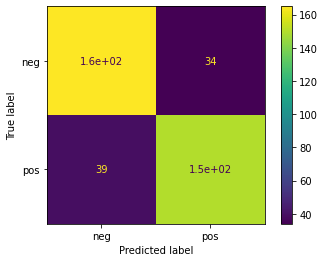

In [14]:
from sklearn.metrics import plot_confusion_matrix, classification_report

print(classification_report(y_test, bow_preds))
plot_confusion_matrix(pipe_bow, X_test, y_test);

              precision    recall  f1-score   support

         neg       0.87      0.84      0.86       199
         pos       0.84      0.87      0.85       189

    accuracy                           0.86       388
   macro avg       0.86      0.86      0.86       388
weighted avg       0.86      0.86      0.86       388



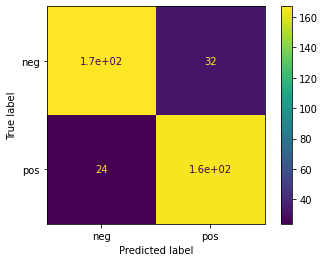

In [15]:
print(classification_report(y_test, tfidf_preds))
plot_confusion_matrix(pipe_tfidf, X_test, y_test);